# Text Classification Exercises

## Exercise 1: Dataset Exploration

**Objective**: Familiarize yourself with the dataset.

1. Load the **News Category Dataset** (News_Category_Dataset_v3.json), which contains approximately 210,000 news headlines from 2012 to 2022. **Hint: read the file with Python, parse it with the json library and convert it to a pandas DataFrame.** **Note: you need to extract the file from the zip archive before loading it.**
2. Identify the target label.
3. Which features do you find relevant for the classification task?
4. Perform exploratory data analysis (EDA):
   - Check for any missing values.
   - Visualize the distribution of categories.


In [8]:
import pandas as pd
import json

with open ("../../data/News_Category_Dataset_v3.json", 'r') as f:
    data = f.read()
    
json_data = [json.loads(line) for line in data.split('\n') if line] [:100]
df = pd.DataFrame(json_data)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [9]:
df = df[['headline', 'category' , 'short_description']]
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [13]:
top10 = df['category'].value_counts().nlargest(10)
top10

category
U.S. NEWS         23
WORLD NEWS        20
ENTERTAINMENT     17
POLITICS          16
SPORTS             7
CULTURE & ARTS     5
ENVIRONMENT        5
TECH               2
WEIRD NEWS         2
COMEDY             1
Name: count, dtype: int64

In [15]:
top10 = top10.index

df_i = df[df['category'].isin(top10)]
df_i

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
5,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...
...,...,...,...
95,Fast-Moving Fairview Fire Kills At Least 2 In ...,U.S. NEWS,A second fire killed two people in Northern Ca...
96,"Kody Clemens Strikes Out MVP Shohei Ohtani, Tr...",SPORTS,The Detroit Tigers' rookie utility player got ...
97,Mississippi Governor Says Water Pressure Is No...,U.S. NEWS,"The city remains under a boil water notice, wh..."
98,"Meta, Parent Company Of Instagram, Fined $400 ...",U.S. NEWS,The social media giant was fined for violation...


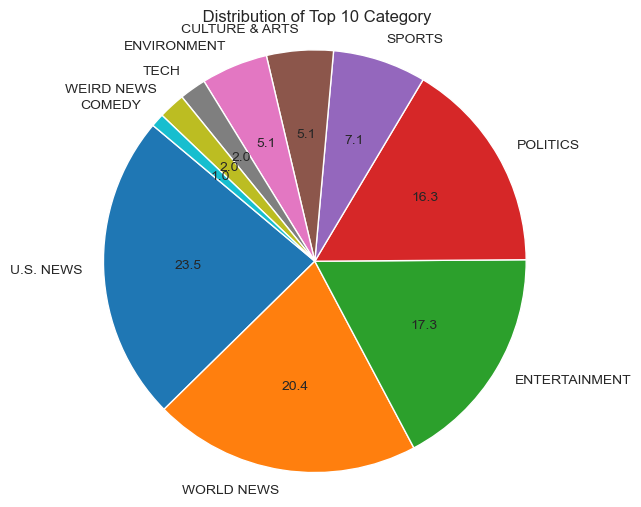

In [17]:
import matplotlib.pyplot as plt
category_counts = df_i['category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f', startangle=140)
plt.title(" Distribution of Top 10 Category")
plt.axis('equal')
plt.show()


## Exercise 2: Text Preprocessing

**Objective**: Prepare the text data for classification tasks.

1. Preprocess the "headline" and "short_description" fields by performing the following steps:
   - Convert all text to lowercase.
   - Remove punctuation, digits, and any other irrelevant characters.
   - Remove stop words.
   - Apply either stemming or lemmatization.
2. Observe how the data changes at each step of preprocessing.
3. Create a new column that concatenates the processed "headline" and "short_description" fields.

## Exercise 3: Data Splitting

**Objective**: Split the dataset into training and testing sets.

1. Divide the data into **training** and **testing** sets.
   - Use an appropriate train-test split ratio (e.g., 80-20 or 70-30).
   - Ensure the split is **stratified** to maintain the distribution of categories.
   

## Exercise 4: Feature Extraction

**Objective**: Convert the text data into numerical features.

1. Apply one of the following feature extraction techniques:
   - **Bag-of-Words (BoW)**
   - **TF-IDF**
   - Optionally, apply N-grams (unigrams, bigrams, etc.) before feature extraction.
2. Use either the **sklearn** or **nltk** packages for feature extraction.

## Exercise 5: Clustering

**Objective**: Cluster news articles based on their content.

1. Apply KMeans clustering to group news articles into 42 clusters.
2. Visualize the clusters using PCA or t-SNE.

## Exercise 6: Model Training

**Objective**: Train machine learning models for text classification.

1. Train various machine learning models on the preprocessed and vectorized data.
   - Choose models from the **sklearn** library (e.g., Logistic Regression, Random Forest, SVM).
   

## Exercise 7: Model Evaluation

**Objective**: Evaluate the performance of the trained models.

1. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.
2. Perform **cross-validation** on at least one model to ensure reliable performance evaluation.
